In [1]:
import math
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

**Задание 2.**

Параметры модели

In [2]:
D = 3
alpha = 1.5
N = [10, 25, 50, 75, 100, 150, 200, 250, 300, 350]
H = [2, 5, 7]

Заданная ковариационная функция R(t).

In [3]:
def R(t):
    return D * math.exp(- alpha * abs(t))
def Cum(t):
    return (R(0)-R(t))

Моделирование десяти наборов наблюдений.

In [4]:
def gen_x(n):
    np.random.seed(2023)
    
    x = np.random.normal(0, 1, n)
    a0 = math.sqrt(D * (1 - math.exp(- 2 * alpha)))
    b1 = math.exp(- alpha)

    res = [0.] * n
    res[0] = a0 * x[0]
    for j in range(1, n):
        res[j] = a0 * x[j] + b1 * res[j - 1]
    

    return res

def gen_X(N):
    count = len(N)
    X = [0.]*count
    for i in range(count):
        X[i] = [.0]*N[i]

    for i in range(count):
        X[i] = gen_x(N[i])
    
    return X

X = gen_X(N)

def gen_D_classic(X, H):
    D_classic = [.0] * len(H)

    for i in range(len(H)):
        D_classic[i] = [.0] * len(X)

    for i in range(len(H)):
        h = H[i]

        for j in range(len(X)):
            D_classic[i][j] = 0

            for s in range(1, len(X[j]) - h + 1):
                for t in range(1, len(X[j]) - h + 1):
                    D_classic[i][j] += math.pow(Cum(s - t + h) + Cum(s - t - h) - (2 * Cum(s - t)), 2)

            D_classic[i][j] /= 2 * math.pow(len(X[j]) - h, 2)

    return D_classic

def gen_D_robust(X, H):
    D_robust = [.0] * len(H)

    for i in range(len(H)):
        D_robust[i] = [.0] * len(X)

    for i in range(len(H)):
        h = H[i]

        for j in range(len(X)):
            D_robust[i][j] = 0

            for s in range(1, len(X[j]) - h + 1):
                for t in range(1, len(X[j]) - h + 1):
                    D_robust[i][j] += math.pow(Cum(s - t + h) + Cum(s - t - h) - (2 * Cum(s - t)), 2)

            D_robust[i][j] *= 10 / math.pow(len(X[j]) - h, 2)
            D_robust[i][j] /= math.pow(0.457 + (0.494 / (len(X[j]) - h)) + (0.045 / math.pow(len(X[j]) - h, 2)), 2)
            D_robust[i][j] *= (1 / math.sqrt(math.pi)) - (math.pow(math.gamma(3 / 4), 2) / math.pi)
            D_robust[i][j] *= math.pow(math.gamma(3 / 4), 6) / math.pow(math.pi, 3)


    return D_robust

Значения дисперсий

In [5]:
D_classic = gen_D_classic(X, H)
D_robust = gen_D_robust(X, H)

print("Дисперсия классической оценки:")
for i in range(len(H)):
    for j in range(len(X)):
        print(D_classic[i][j], end = " ")

    print("")

print("Дисперсия робастной оценки:")
for i in range(len(H)):
    for j in range(len(X)):
        print(D_robust[i][j], end = " ")

    print("")

Дисперсия классической оценки:
2.793361154116681 1.0292088527615961 0.5008299038773929 0.33090124112518815 0.2470671938128647 0.1639771073878761 0.12270879989463669 0.0980358516830555 0.08162378105445647 0.06991874325872977 
3.9055881377029102 1.356905533020571 0.6347942466963113 0.41390907875751626 0.30701945953059767 0.20243723638369898 0.1509963226211869 0.12040029055183639 0.10011398693567809 0.08567789948146155 
6.407539785707091 1.4358805411649378 0.6548180793497613 0.4230735212149616 0.31238585911414934 0.20504141827174413 0.15259358986817143 0.12150968341140636 0.10094575315403491 0.08633442383089834 
Дисперсия робастной оценки:
1.949075845354724 0.8460948660681804 0.4317896747139101 0.2896523400298396 0.2178913380769664 0.1456868570453196 0.10942244912982753 0.08761285003631782 0.07305210145727561 0.06264134060938563 
2.365022568853765 1.1004944685471438 0.545677004499132 0.36185886466468836 0.2705770932984241 0.17980306796383327 0.1346246141176682 0.1075880972681667 0.0895939

Графики зависимости дисперсии от количества наблюдений

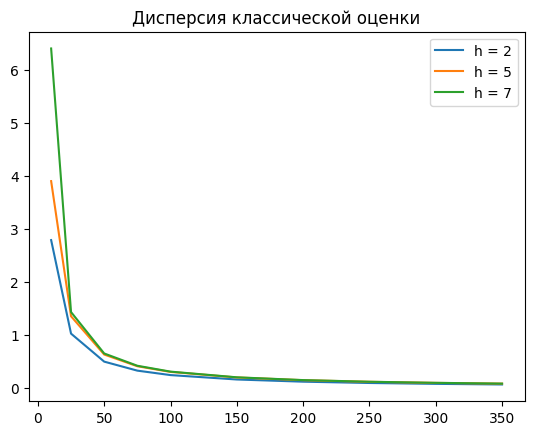

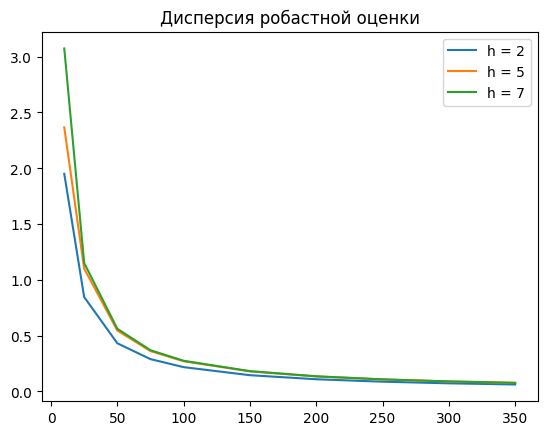

In [6]:
h = [.0] * len(X)
for i in range(len(X)):
    h[i] = len(X[i])

for i in range(len(H)):
    plt.plot(h, D_classic[i], label = 'h = '+str(H[i]))
    plt.title("Дисперсия классической оценки")
    plt.legend()
plt.show()

for i in range(len(H)):
    plt.plot(h, D_robust[i], label = 'h = '+str(H[i]))
    plt.title("Дисперсия робастной оценки")
    plt.legend()
plt.show()

Из графиков видно, что дисперсия оценок на любом из рассмотренных лагов стремится к нулю при больших n. Соответственно, можем сделать вывод, что оценки являются состоятельными в среднем квадратическом, что согласуется с теорией.
Также можно заметить, что дисперсия для бОльших лагов сходится к нулю немного медленнее. Это можно объяснить тем, что в оценке чем больше лаг, тем меньше слагаемых в сумме.
Кроме того, дисперсия робастной оценки получилась немного меньше классической, особенно для n=10. Т.е. она более устойчива к малому количеству наблюдений.